# Importing lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn import impute
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
df = pd.read_json('data.json')
df.head()

,_id,price,description,address,area,start_date,end_date,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,direction,street_in_front_of_house,width,height,law
0,{'$oid': '61ab963ae2434d9b2bf85176'},"5,4 tỷ",+ Cần bán gấp đất MINH KHAI.\r\n+ Diện tích 70...,"Đường Minh Khai, Phường Minh Khai, Quận Hai B...",70 m,Ngày đăng: 03/12/2021,NaN,4,3,False,False,False,False,False,Nhà trong hẻm,_,3m,"7,7m","9,5m",Sổ hồng/ Sổ đỏ
1,{'$oid': '61ab963ae2434d9b2bf85177'},"4,45 tỷ","- Vị trí cự kỳ trắc địa, trung tâm dân cư trí ...","Đường Lê Trọng Tấn, Phường Sơn Kỳ, Quận Tân P...",64 m,Ngày đăng: 03/12/2021,NaN,4,4,True,True,True,True,False,Nhà mặt tiền,_,7m,4m,16m,---
2,{'$oid': '61ab963ae2434d9b2bf85178'},"5,6 tỷ",nhà phố 200m2 - 4 tầng chỉ 5 căn đẹp nhất (mặt...,"Đường An Phú Đông 1, Phường An Phú Đông, Quận...",64 m,Ngày đăng: 03/12/2021,NaN,4,4,True,True,True,True,False,Nhà mặt tiền,_,12m,"4,5m",15m,Sổ hồng/ Sổ đỏ
3,{'$oid': '61ab963ae2434d9b2bf85179'},"1,5 tỷ","- Giá đã gồm bao sang tên, Nhà chính chủ đứng ...","Đường Lê Trọng Tấn, Phường Yên Nghĩa, Quận Hà...",31 m,Ngày đăng: 03/12/2021,NaN,3,3,False,False,False,False,False,Nhà mặt tiền,Đông Nam,3m,4m,8m,Sổ hồng/ Sổ đỏ
4,{'$oid': '61ab963ae2434d9b2bf8517a'},"1,12 tỷ",Chính chủ tên sổ đỏ cần bán\r\nNhà xây 3 tầng ...,"Đường Biên Giang, Phường Biên Giang, Quận Hà ...",30 m,Ngày đăng: 03/12/2021,NaN,3,3,False,False,False,False,False,Nhà trong hẻm,Đông Nam,3m,4m,8m,Sổ hồng/ Sổ đỏ


In [3]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75636 entries, 0 to 75635
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       75636 non-null  object 
 1   price                     75636 non-null  object 
 2   description               75386 non-null  object 
 3   address                   75636 non-null  object 
 4   area                      75636 non-null  object 
 5   start_date                75636 non-null  object 
 6   end_date                  0 non-null      float64
 7   floor_number              75636 non-null  object 
 8   bedroom_number            75636 non-null  object 
 9   is_dinning_room           75636 non-null  bool   
 10  is_kitchen                75636 non-null  bool   
 11  is_terrace                75636 non-null  bool   
 12  is_car_pack               75636 non-null  bool   
 13  is_owner                  75636 non-null  bool   
 14  type  

In [4]:
# Drop _id and end_date column
df = df.drop(['_id', 'start_date', 'end_date', 'description'], axis=1)
df.shape

(75636, 16)

# Preprocessing

In [5]:
def convert_area(area):
    for i in range(len(area)):
        try:
            if re.search("m$", area[i]):
                area[i] = re.sub("m", "", area[i])
                area[i] = re.sub(",", ".", area[i])
                area[i] = float(area[i])
            else:
                area[i] = np.nan
        except:
            area[i] = np.nan
    return area

def convert_direction(direction):
    for i in range(len(direction)):
        if (direction[i] == '_'):
            direction[i] = np.nan
        else:
            continue
    return direction

def convert_law(law):
    for i in range(len(law)):
        if law[i] == "---":
            law[i] = np.nan
        else:
            continue
    return law
        
def convert_price(price, area):
    for i in range(len(price)):
        try:
            if re.search("tỷ $", price[i]):
                price[i] = price[i].split(' ')[1]
                price[i] = re.sub(",", ".", price[i])
                price[i] = float(price[i])
            else:
                price[i] = np.nan
        except:
            price[i] = np.nan
    return price

def convert_address(address):
    city = []
    district = []
    for i in range(len(address)):
        address[i] = re.split(', ', address[i])
        try:
            if re.search('Quận ', address[i][-2]):
                address[i][-2] = re.sub('Quận ', '', address[i][-2])
            else:
                address[i][-2] = re.sub('Huyện ', '', address[i][-2])
        except:
            address[i][-2] = np.nan
        district.append(address[i][-2])
        city.append(address[i][-1])
        
    return city, district

In [6]:
price = df['price'].tolist()
area = df['area'].tolist()
width = df['width'].tolist()
height = df['height'].tolist()
street_infront_house = df['street_in_front_of_house'].tolist()
direction = df['direction'].tolist()
law = df['law'].tolist()
address = df['address'].tolist()

area = convert_area(area)
width = convert_area(width)
height = convert_area(height)
street_infront_house = convert_area(street_infront_house)
direction = convert_direction(direction)
price = convert_price(price, area)
law = convert_law(law)
city, district = convert_address(address)

df['price'] = price
df['area'] = area
df['width'] = width
df['height'] = height
df['street_in_front_of_house'] = street_infront_house
df['direction'] = direction
df['law'] = law
df['city'] = city
df['district'] = district

bedroom_no = df['bedroom_number'].tolist()
floor_no = df['floor_number'].tolist()
for i in range(len(bedroom_no)):
    try:
        bedroom_no[i] = float(bedroom_no[i])
    except:
        bedroom_no[i] = np.nan

for i in range(len(floor_no)):
    try:
        floor_no[i] = float(floor_no[i])
    except:
        floor_no[i] = np.nan
df['bedroom_number'] = bedroom_no
df['floor_number'] = floor_no
df = df.drop(['address'], axis=1)
df.head()

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,direction,street_in_front_of_house,width,height,law,city,district
0,5.40,70.0,4.0,3.0,False,False,False,False,False,Nhà trong hẻm,NaN,3.0,7.7,9.5,Sổ hồng/ Sổ đỏ,Hà Nội,Hai Bà Trưng
1,4.45,64.0,4.0,4.0,True,True,True,True,False,Nhà mặt tiền,NaN,7.0,4.0,16.0,NaN,Hồ Chí Minh,Tân Phú
2,5.60,64.0,4.0,4.0,True,True,True,True,False,Nhà mặt tiền,NaN,12.0,4.5,15.0,Sổ hồng/ Sổ đỏ,Hồ Chí Minh,12
3,1.50,31.0,3.0,3.0,False,False,False,False,False,Nhà mặt tiền,Đông Nam,3.0,4.0,8.0,Sổ hồng/ Sổ đỏ,Hà Nội,Hà Đông
4,1.12,30.0,3.0,3.0,False,False,False,False,False,Nhà trong hẻm,Đông Nam,3.0,4.0,8.0,Sổ hồng/ Sổ đỏ,Hà Nội,Hà Đông


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75636 entries, 0 to 75635
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     74425 non-null  float64
 1   area                      75617 non-null  float64
 2   floor_number              72391 non-null  float64
 3   bedroom_number            73516 non-null  float64
 4   is_dinning_room           75636 non-null  bool   
 5   is_kitchen                75636 non-null  bool   
 6   is_terrace                75636 non-null  bool   
 7   is_car_pack               75636 non-null  bool   
 8   is_owner                  75636 non-null  bool   
 9   type                      75636 non-null  object 
 10  direction                 11796 non-null  object 
 11  street_in_front_of_house  75325 non-null  float64
 12  width                     58253 non-null  float64
 13  height                    39911 non-null  float64
 14  law   

# Check number of missing values

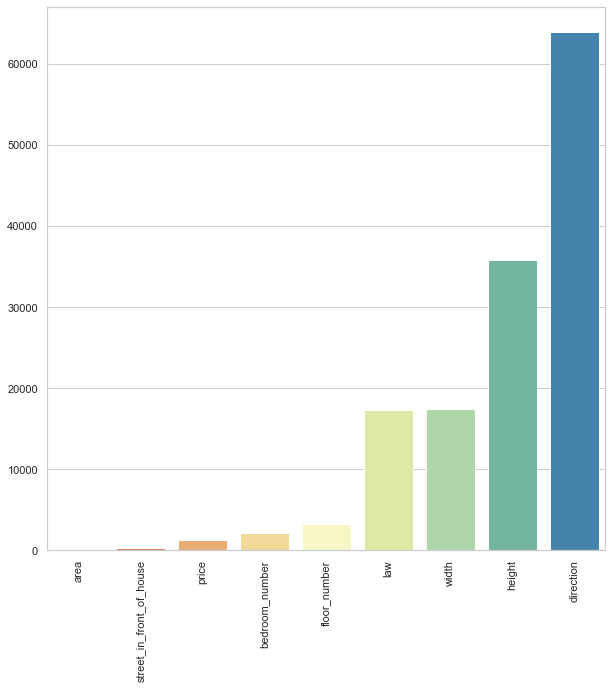

In [8]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.barplot(x = missing.index.tolist(), y = missing, palette = 'Spectral')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [9]:
# drop direction column
# df = df.drop(['direction'], axis=1)
df = df[df.price.notna()]

# Divide features into numerical and categorical

In [10]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_numerical.columns

Index(['price', 'area', 'floor_number', 'bedroom_number',
       'street_in_front_of_house', 'width', 'height'],
      dtype='object')

In [11]:
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()
features_categorical.columns

Index(['is_dinning_room', 'is_kitchen', 'is_terrace', 'is_car_pack',
       'is_owner', 'type', 'direction', 'law', 'city', 'district'],
      dtype='object')

# Visualizations

## Line plot

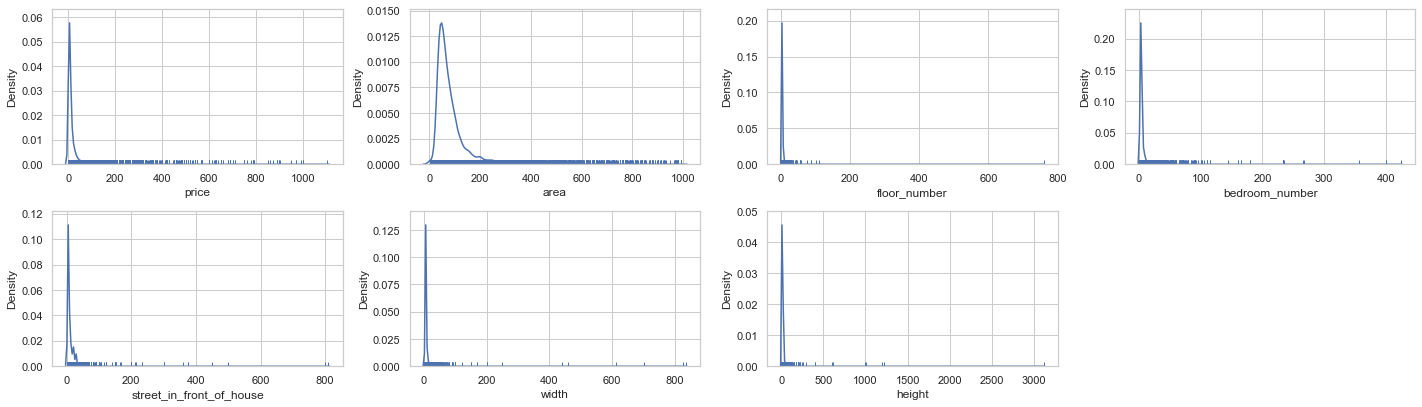

In [12]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

In [13]:
# Phân bố dữ liệu quá lệch, do đó loại một số outlier
df.drop(df[df.price > 200].index, inplace = True)
df.drop(df[df.area > 400].index, inplace = True)
df.drop(df[df.floor_number > 50].index, inplace = True)
df.drop(df[df.bedroom_number > 50].index, inplace = True)
df.drop(df[df.street_in_front_of_house > 100].index, inplace = True)
df.drop(df[df.width > 100].index, inplace = True)
df.drop(df[df.height > 200].index, inplace = True)

features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()

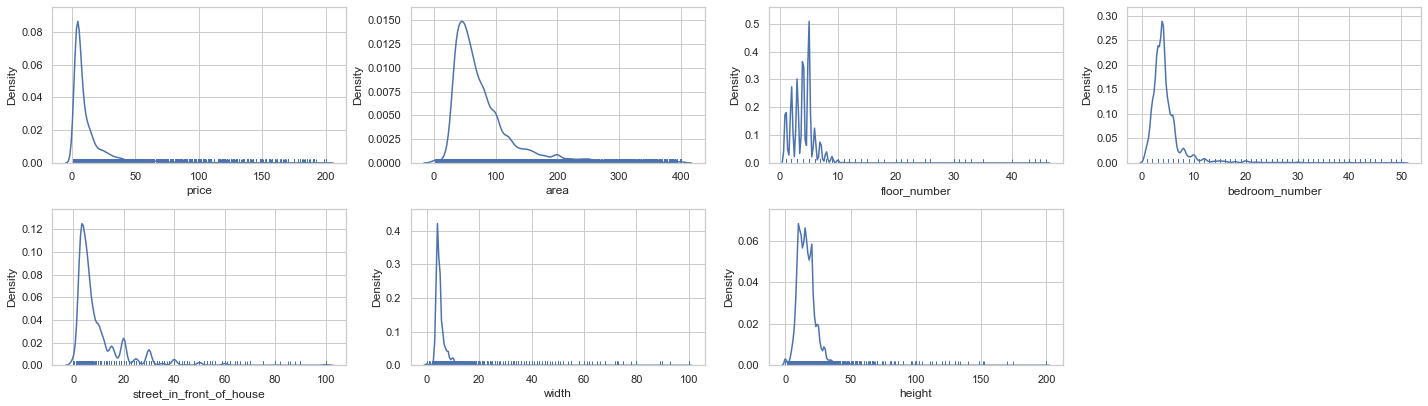

In [14]:
# vẽ lại line plot
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

## Boxplot

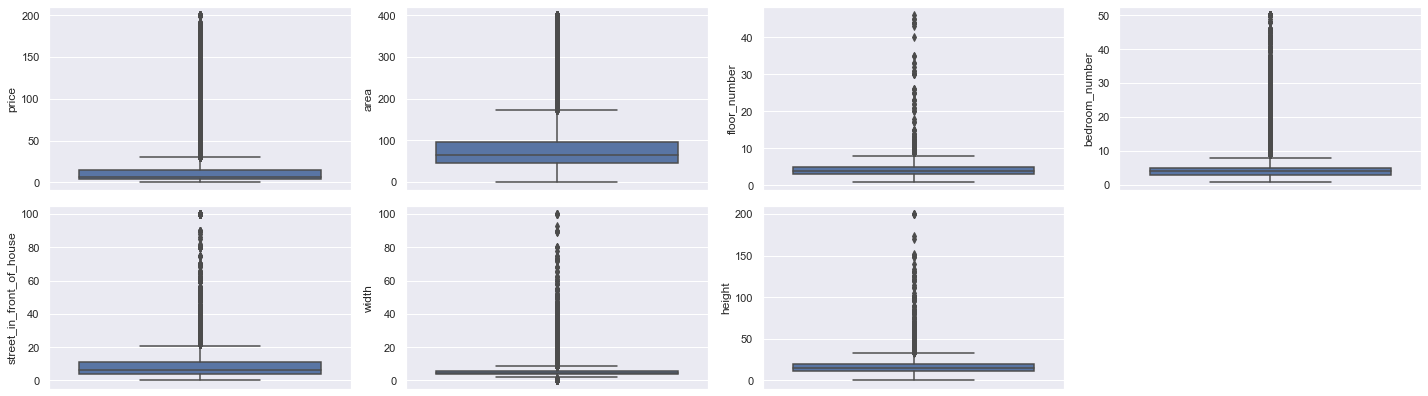

In [15]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

## Remove outliers

In [16]:
df.drop(df[df.price <= 0].index, inplace = True)
df.drop(df[df.price > 15].index, inplace = True)

df.drop(df[df.area > 125].index, inplace = True)
df.drop(df[df.area <= 0].index, inplace = True)

df.drop(df[df.floor_number > 8].index, inplace = True)
df.drop(df[df.floor_number <= 0].index, inplace = True)

df.drop(df[df.bedroom_number > 8].index, inplace = True)
df.drop(df[df.bedroom_number < 2].index, inplace = True)

df.drop(df[df.street_in_front_of_house > 15].index, inplace = True)

df.drop(df[df.width > 7].index, inplace = True)
df.drop(df[df.width <= 2].index, inplace = True)

df.drop(df[df.height > 30].index, inplace = True)
df.drop(df[df.height <= 0].index, inplace = True)

features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()

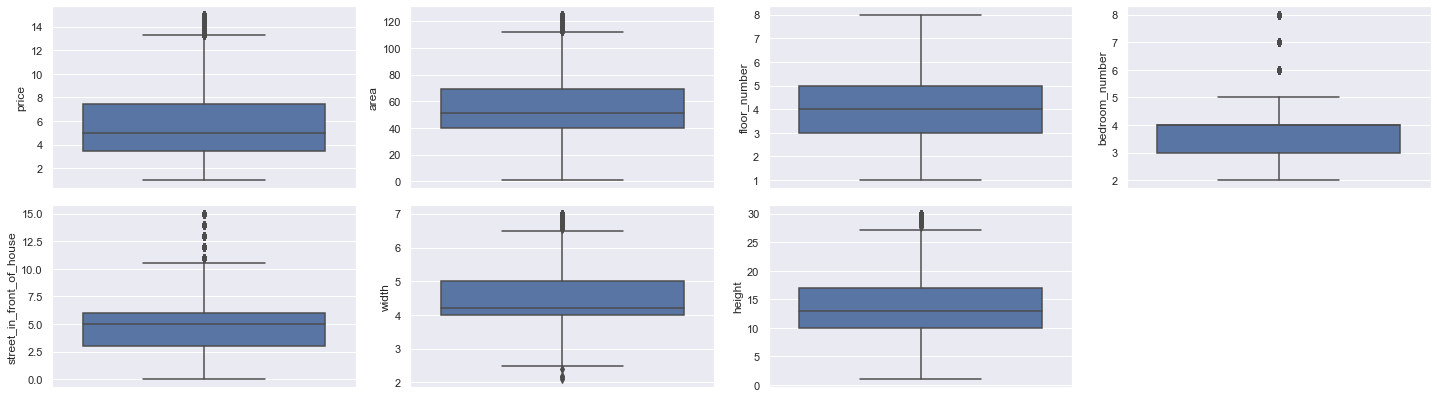

In [17]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

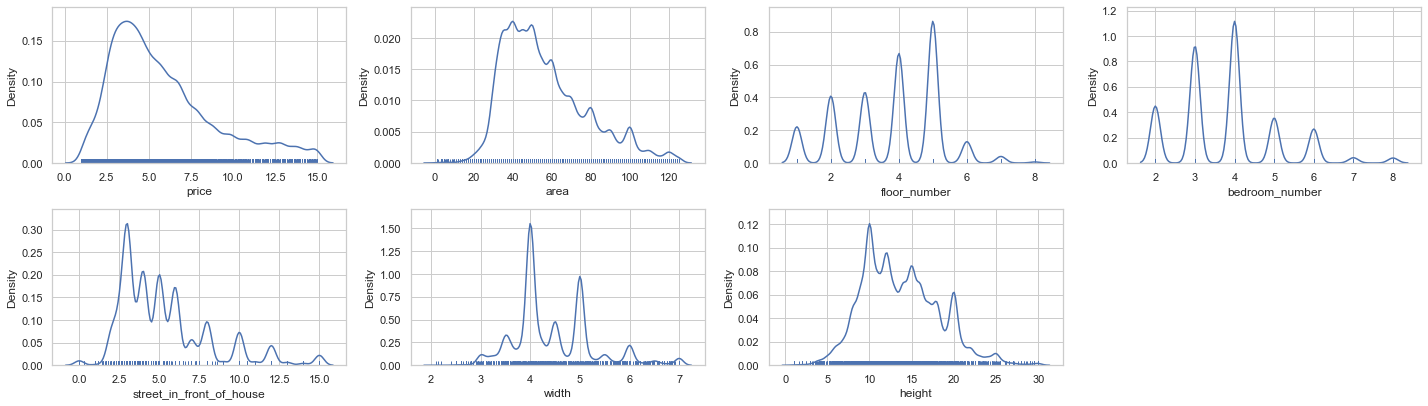

In [18]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

In [19]:
df.shape

(45538, 17)

# Dropping unnecessary features 

In [20]:
correlation = df.select_dtypes(exclude=['object', 'bool']).corr()

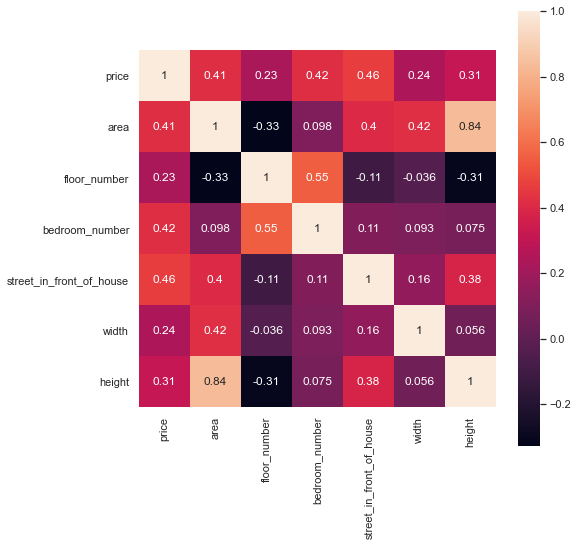

In [21]:
fig = plt.figure(figsize = (8, 8))
sns.heatmap(correlation, annot = True, square = True)
plt.show()

In [22]:
df = df.drop(['height'], axis=1)

# Fill missing values in numerical features

In [23]:
df.select_dtypes(exclude=['object', 'bool']).isna().mean().sort_values(ascending = False)

width                       0.251131
floor_number                0.029075
bedroom_number              0.017392
street_in_front_of_house    0.004019
area                        0.000307
price                       0.000000
dtype: float64

In [24]:
columns = ['width', 'floor_number', 'bedroom_number', 'street_in_front_of_house', 'price', 'area']
for i in columns:
    imp = impute.SimpleImputer()
    df[i] = imp.fit_transform(np.array(df[i]).reshape(-1,1))
    if i == 'floor_number' or i == 'bedroom_number':
        df[i] = df[i].round()

## Replacing missing values in categorical features

In [25]:
df.fillna('None', inplace = True)

In [26]:
features_categorical = df.select_dtypes(include=['object', 'bool'])
features_categorical.columns

Index(['is_dinning_room', 'is_kitchen', 'is_terrace', 'is_car_pack',
       'is_owner', 'type', 'direction', 'law', 'city', 'district'],
      dtype='object')

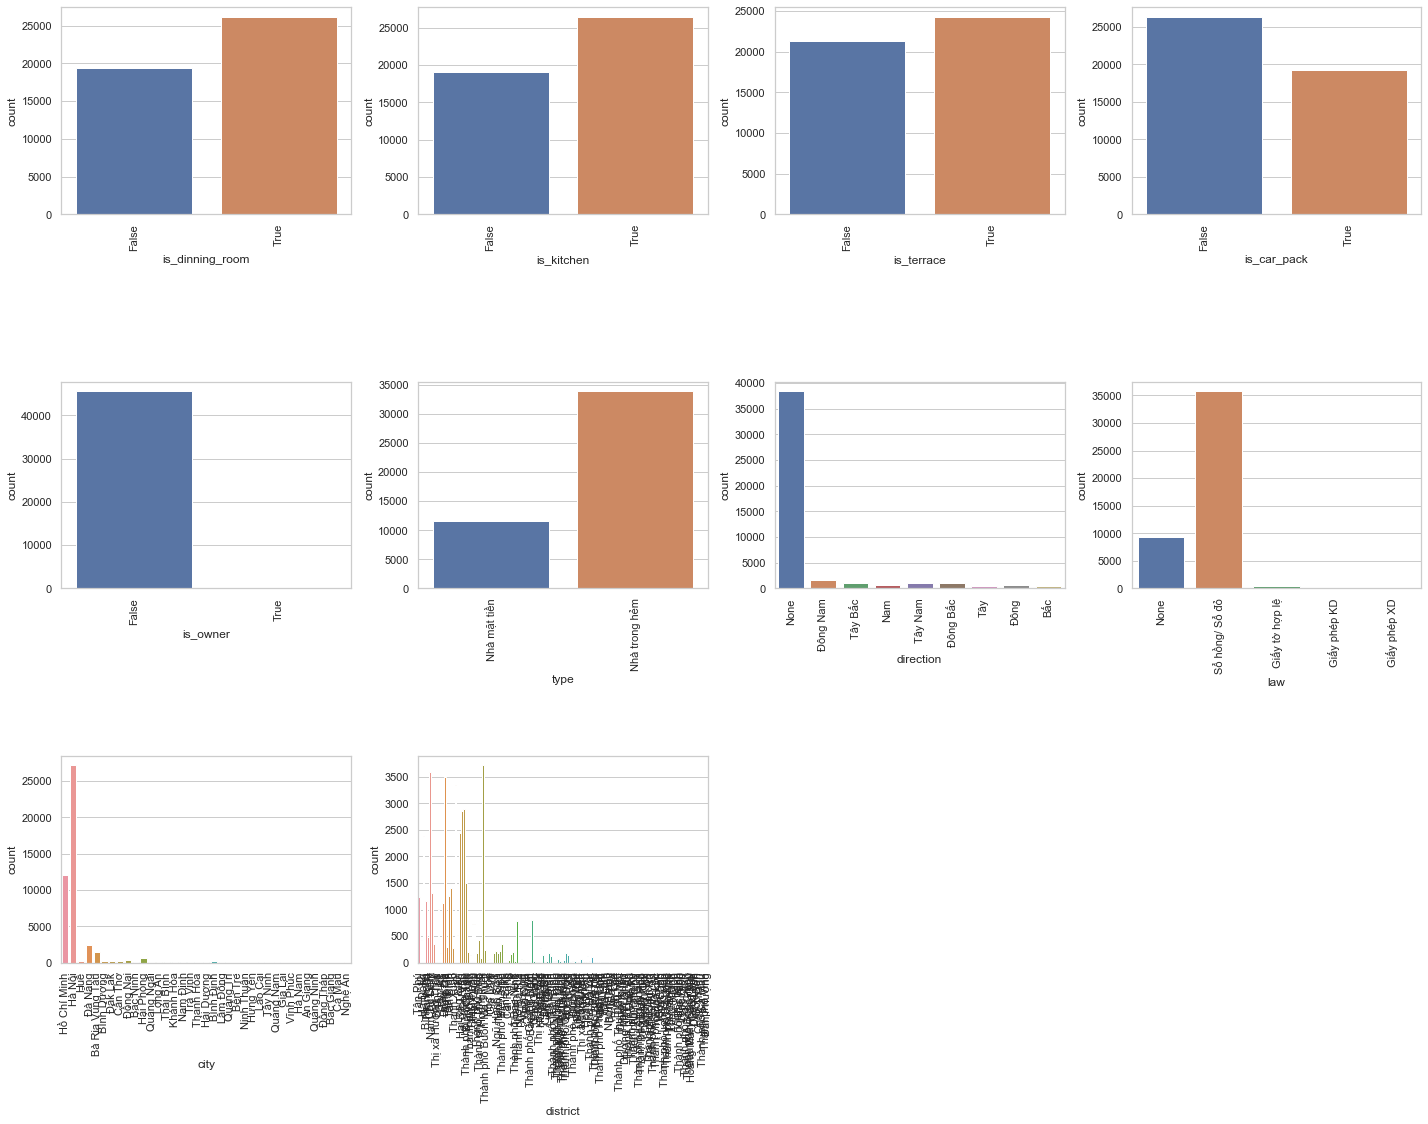

In [27]:
fig = plt.figure(figsize = (20,50))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(10, 4, i+1)
    ax = sns.countplot(features_categorical.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

In [28]:
df = df.drop(columns=['is_owner', 'law'], axis=1)
df.drop(df[(df.city != 'Hà Nội') & (df.city != 'Hồ Chí Minh')].index, inplace = True)

features_categorical = df.select_dtypes(include=['object', 'bool'])

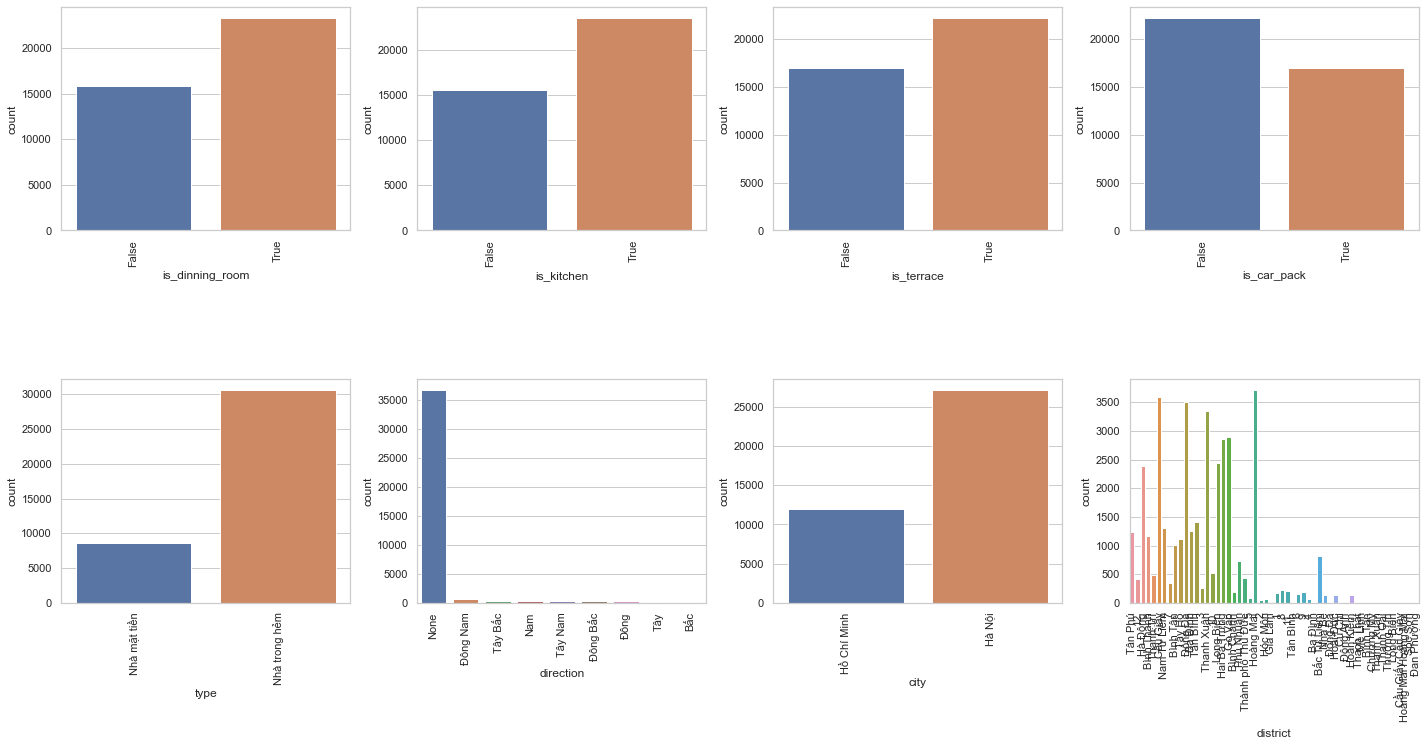

In [29]:
fig = plt.figure(figsize = (20,50))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(10, 4, i+1)
    ax = sns.countplot(features_categorical.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

In [30]:
df.district.value_counts()

Hoàng Mai               3715
Cầu Giấy                3601
Đống Đa                 3501
Thanh Xuân              3349
Gò Vấp                  2901
Hai Bà Trưng            2855
Long Biên               2445
Hà Đông                 2382
Tân Bình                1406
Nam Từ Liêm             1315
Ba Đình                 1261
Tân Phú                 1238
Bình Thạnh              1160
Tây Hồ                  1121
Bình Tân                1015
Bắc Từ Liêm              810
Phú Nhuận                723
10                       520
Thanh Trì                489
Thành phố Thủ Đức        428
12                       420
7                        347
3                        267
8                        222
11                       203
9                        197
Bình Chánh               196
1                        173
6                        161
Hoài Đức                 139
Nhà Bè                   133
Hoàn Kiếm                131
5                         89
4                         70
Hóc Môn       

In [31]:
def convert_district(district):
    for i in range(len(district)):
        if district[i] in ['Đống Đa', 'Cầu Giấy', 'Thanh Xuân', 'Hoàng Mai', 'Hai Bà Trưng', 'Gò Vấp', \
                           'Tân Bình', 'Ba Đình', 'Tây Hồ', 'Tân Phú', 'Bình Thạnh', 'Phú Nhuận', '10', \
                           '1', '3', '7', 'Hoàn Kiếm', '11', '8', '6', '5', '2', '4', ' Tân Bình', ' Đống Đa', \
                           ' 6', ' Cầu Giấy Cầu Giấy', ' Hoàng Mai Hoàng Mai']:
            district[i] = 'Nội thành'
        else:
            district[i] = 'Ngoại thành'
    
    return district

def convert_city(city):
    for i in range(len(city)):
        if city[i] == 'Hà Nội':
            city[i] = 1
        else:
            city[i] = 0
    
    return city

def convert_type(typ):
    for i in range(len(typ)):
        if typ[i] == 'Nhà mặt tiền':
            typ[i] = 1
        else:
            typ[i] = 0
    
    return typ

In [32]:
district = df['district'].tolist()
district = convert_district(district)
df['district'] = district

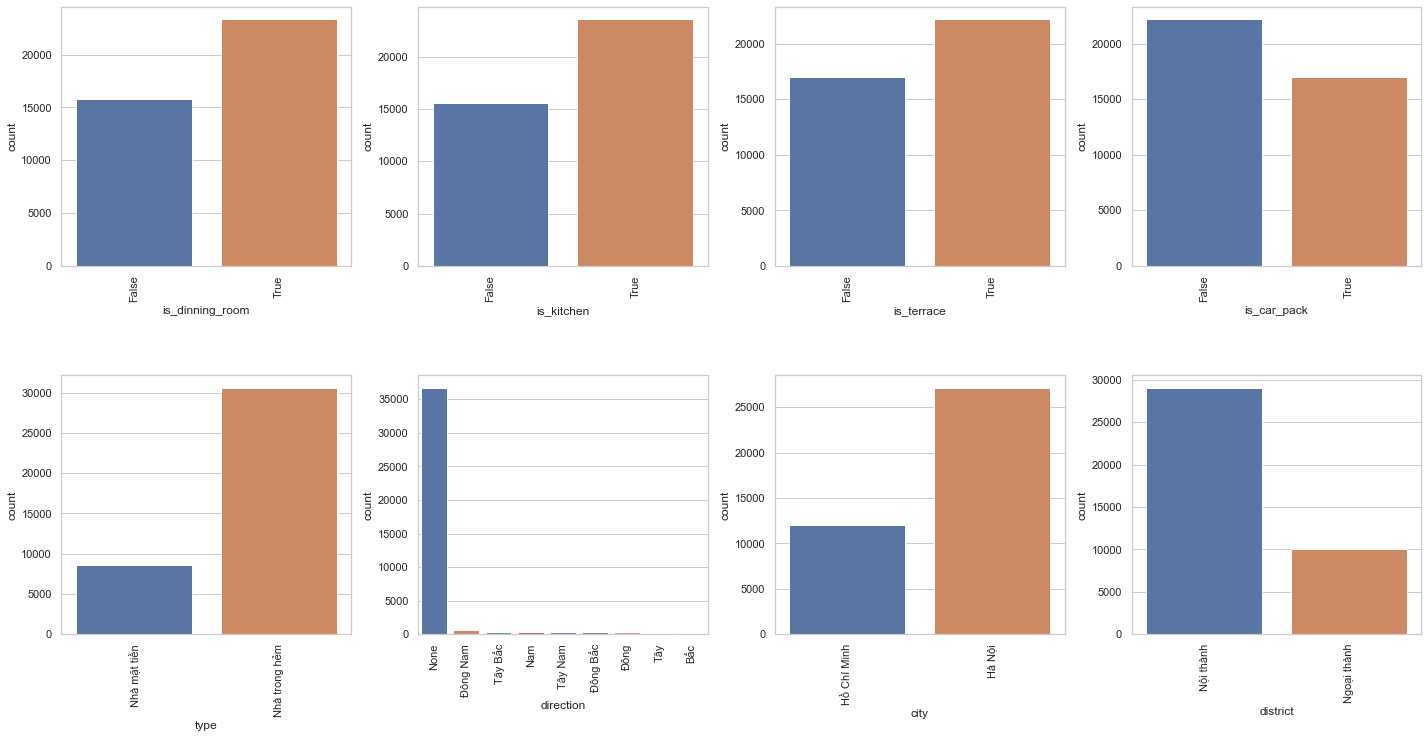

In [33]:
features_categorical = df.select_dtypes(include=['object', 'bool'])
fig = plt.figure(figsize = (20,50))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(10, 4, i+1)
    ax = sns.countplot(features_categorical.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

In [34]:
df.to_csv('clean data/visualize_data.csv', index=False, encoding='utf-8')

In [35]:
def convert_binary_district(district):
    for i in range(len(district)):
        if district[i] == 'Nội thành':
            district[i] = 1
        else:
            district[i] = 0
    
    return district

In [36]:
district = df['district'].tolist()
city = df['city'].tolist()
#direction = df['direction'].tolist()
typ = df['type'].tolist()

district = convert_binary_district(district)
city = convert_city(city)
#direction = convert_direction(direction)
typ = convert_type(typ)

df['district'] = district
df['city'] = city
#df['direction'] = direction
df = pd.get_dummies(df, columns=['direction'])
df['type'] = typ
df['is_dinning_room'] = df['is_dinning_room'].astype(int)
df['is_kitchen'] = df['is_kitchen'].astype(int)
df['is_terrace'] = df['is_terrace'].astype(int)
df['is_car_pack'] = df['is_car_pack'].astype(int)

df.shape

(39160, 22)

In [37]:
columns = ['width', 'floor_number', 'bedroom_number', 'street_in_front_of_house', 'area']
for i in columns:
    df[i] = np.log(1 + df[i])

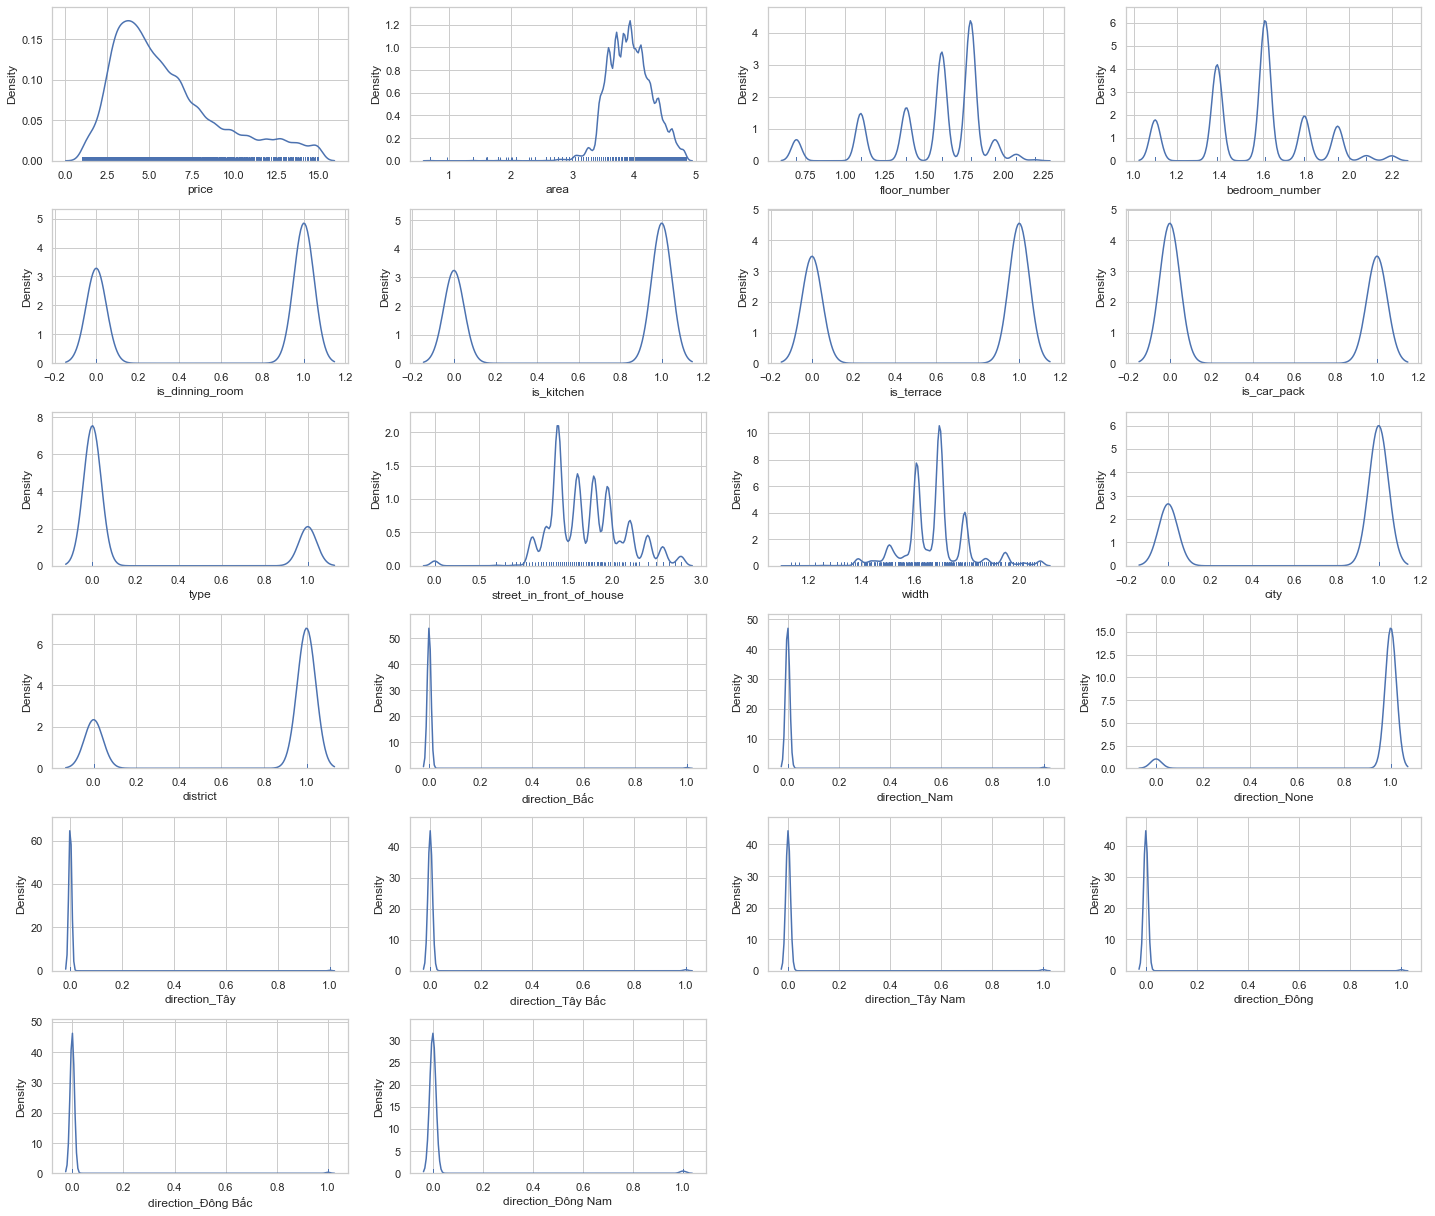

In [38]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()

fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

In [39]:
df.to_csv('clean data/data.csv', index=False)

In [40]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, random_state=9)
df_train, df_val = train_test_split(df_train, train_size=0.75, random_state=9)

In [41]:
df_train.shape

(23496, 22)

In [42]:
df_val.shape

(7832, 22)

In [43]:
df_test.shape

(7832, 22)

In [44]:
df_train.to_csv('clean data/train.csv', index=False)
df_val.to_csv('clean data/val.csv', index=False)
df_test.to_csv('clean data/test.csv', index=False)